# 문자열 데이터-정규 표현식
- 복잡, 다양한 문자열에서 필요한 문자와 패턴을 추출할 수 있음
- match: 문자열의 처음부터 정규식과 매치되는지 조사
- serch: 문자열 전체를 검색하여 정규식과 매치되는지 조사

## 패턴을 만들기 위한 여러가지 특수문자들이 존재
- 숫자 패턴: [0-9]
- 문자{개수}, 문자열{개수}

In [3]:
import re

In [12]:
re.search('[0-9]','1,2,3,4,5')

<re.Match object; span=(0, 1), match='1'>

- 패턴을 확장하기 위해 사용하는 특수문자: *, +

In [13]:
re.search('[0-9]*','1,2,3,4,5')

<re.Match object; span=(0, 1), match='1'>

In [14]:
re.search('[0-9]+','1,2,3,4,5')

<re.Match object; span=(0, 1), match='1'>

In [15]:
re.match('a{5}', 'aaaaaa10')

<re.Match object; span=(0, 5), match='aaaaa'>

In [16]:
re.match('(hi){5}','hihihihihi1234')

<re.Match object; span=(0, 10), match='hihihihihi'>

## 전화번호 패턴
- 000-0000-0000
- 모든숫자(3개) - 모든숫자(4개) - 모든숫자(4개)

In [17]:
re.match('[0-9]{3}-[0-9]{4}-[0-9]{4}', '010-1234-5678')

<re.Match object; span=(0, 13), match='010-1234-5678'>

In [18]:
re.match('[0-9]*-[0-9]*-[0-9]*', '010-1234-5678')

<re.Match object; span=(0, 13), match='010-1234-5678'>

## 문자

### 알파벳
- a-z : 모든 알파벳 소문자
- A-Z : 모든 알파벳 대문자
- A-z : 모든 알파벳

### 한글
- 가-힣 : 모든 한글
- ㄱ-ㅎ
- ㅏ-ㅣ

### 특수문자
- 앞에 \
- /d : 모든 숫자
- /D : 모든 숫자를 제외
- not [^0-9] 모든 문자를 제외한 것
- \w [a-zA-Z0-9_] 영문, 대소문자, 숫자. 밑줄 문자
- \W [^a-zA-Z0-9_] 위에 \W를 제외한 나머지 다
- 공백 처리하기
- \s 또는 \S

In [19]:
re.match('[a-z]*','hihi1234')

#1234도 찾을 때
re.match('[a-z0-9]*','hihi1234')

#대문자가 있을 때
re.match('[a-zA-Z0-9]*','hihiHI1234')

<re.Match object; span=(0, 10), match='hihiHI1234'>

In [25]:
re.search('[가-힣]+','www.python.org/안녕하세요?')
#? 를 찾지 못함
#특수 문자도 만들어 줘야 함

<re.Match object; span=(15, 20), match='안녕하세요'>

In [22]:
re.search('\?+', '?안녕!')

<re.Match object; span=(0, 1), match='?'>

In [26]:
re.match('[a-zA-Z0-9\s]+', 'hi 12345')

<re.Match object; span=(0, 8), match='hi 12345'>

## 그룹사용하기
- (정규표현식)(정규표현식)

In [27]:
ab = re.match('([0-9]+) ([a-z]+)', '1234 abc')
ab

<re.Match object; span=(0, 8), match='1234 abc'>

In [32]:
ab.group()

'1234 abc'

In [33]:
ab.group(1)

'1234'

In [34]:
ab.group(2)

'abc'

## 이메일을 찾는 정규표현식
- 영어 소문자, 숫자만 가능
- 대문자는 불가능
- 문자열로 시작
- @(홈페이지).com으로 끝남
- 홈페이지에는 문자열만
- '[a-z0-9]*@[a-z]*.[a-z]{3}'

In [28]:
re.match('[a-z0-9]*@[a-z]*.[a-z]{3}','python@gmail.com')

<re.Match object; span=(0, 16), match='python@gmail.com'>

## 텍스트 분석
- 문자열, 텍스트에 대한 데이터 분석
- 문자열이라는 것은 문자이기때문에 컴퓨터에 학습시키기 위해선 수치화가 필요
- 카운팅 기반으로 진행하거나, 빈도에 대한 것으로 수치화
- word2vec 결국에는 다 카운팅 기반, 빈도기반으로 진행하는 것
- 텍스트에 대한 분석이 어떻게 수치화를 하고 그것을 학습시켜서 이후 감성 분석이나 텍스트 분석 등을 실시

In [37]:
import pandas as pd
survey = pd.read_csv('survey_설문지.csv')

In [39]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [40]:
survey['comment']

0            역앞에 젊은이들이 모여있다(AA역)
1          운동할 수 있는 장소가 있는 것이 좋다
2                      육아 지원이 좋다
3     어린이집에 바로 입원할 수 있다(대기아동 없음)
4                    역앞 상가가 쓸쓸하다
                 ...            
81        초등학교 운동장이 잔디밭이라서 아주 좋다
82    홈페이지에서도 설문지를 투고할 수 있게 해 달라
83               공원에 놀이기구가 너무 적다
84                공원을 더 늘렸으면 좋겠다
85             역앞에 주차장이 적다, 불편하다
Name: comment, Length: 86, dtype: object

## commet의 영문자들을 모두 제거, regex를 통해 정규표현식 사용

In [41]:
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"",regex=True)

In [43]:
survey['len'] = survey['comment'].str.len()
# 길이 컬럼

In [44]:
survey

,datetime,comment,satisfaction,len
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1,17.0
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21.0
2,2019-02-18,육아 지원이 좋다,5,9.0
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4,26.0
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11.0
...,...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22.0
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26.0
83,2019-01-09,공원에 놀이기구가 너무 적다,1,15.0
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14.0


(array([19., 19., 20., 11.,  7.,  3.,  4.,  0.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

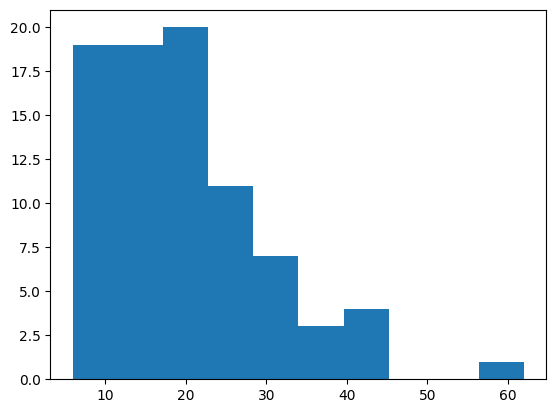

In [46]:
import matplotlib.pyplot as plt
plt.hist(survey['len'])